# Stylistic choices for matplotlib figures

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Generate test data for the basic stylesheet

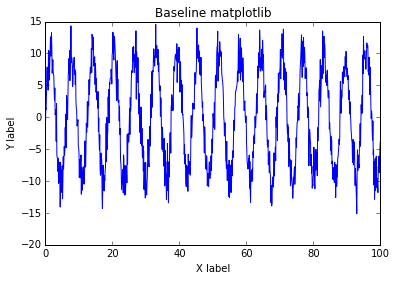

In [2]:
noise = (2*np.random.randn(1000))
x = np.linspace(0,100,1000)
y = np.array(10 * np.sin(x) + noise)

f, ax = plt.subplots(1)
ax.plot(x,y)
ax.set_title('Baseline matplotlib')
ax.set_ylabel('Y label')
ax.set_xlabel('X label')
plt.show()

### Let's see what plotting a bunch of oscillations looks like

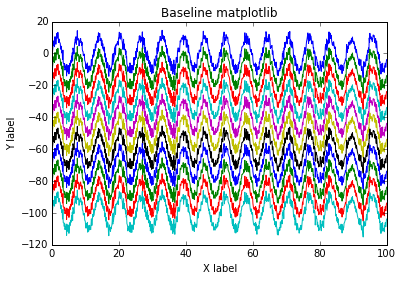

In [3]:
f, ax = plt.subplots(1)
for i in range(11):
    ax.plot(x,y+(i*-10))
ax.set_title('Baseline matplotlib')
ax.set_ylabel('Y label')
ax.set_xlabel('X label')
plt.show()

## Dear lord that's hideous! 
#### Just think of all the time you'll have to put into making that thing presentable!



# THERE IS A BETTER WAY!
Find out where your stylesheets are and see whatcha got

In [4]:
mpl.get_configdir()

'/Users/chadestep/.matplotlib'

In [5]:
mpl.matplotlib_fname()
# stylelib/
# Put the 'estep_style.mplstyle' file in the stylelib/ directory and you're good to go

'/Users/chadestep/anaconda/lib/python3.4/site-packages/matplotlib/mpl-data/matplotlibrc'

In [6]:
# Check to see if it's there
plt.style.available

['fivethirtyeight',
 'tableau10',
 'bmh',
 'grayscale',
 'ggplot',
 'estep_style',
 'dark_background']

## Use the style sheet I developed

In [7]:
plt.style.use('estep_style')

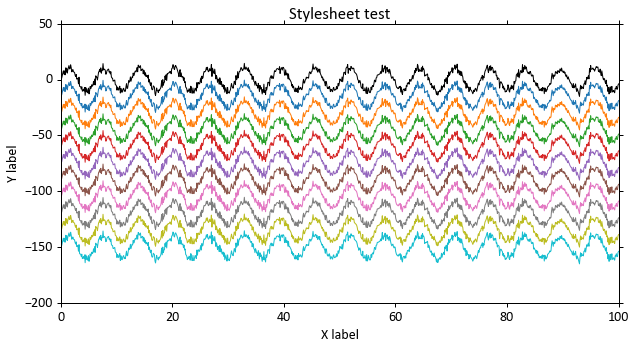

In [8]:
f, ax = plt.subplots(1)
for i in range(11):
    ax.plot(x,y+(i*-15))
ax.set_title('Stylesheet test')
ax.set_ylabel('Y label')
ax.set_xlabel('X label')
plt.show()

# plt.savefig('estep_style.pdf')

# Post-stylesheet formatting (box plots, cleaning boarders, etc)

Style sheets aren't perfect. Things like cleaning up the axes still have to be done after the plot has been rendered. And the text of the figure may not be exactly what you want (there aren't a ton of useful options that export properly to Illustrator, so I picked the closeset one to Myriad Pro), but it's easy enough to change in Illustrator (Select > Object > Text Objects > then just change to whatever you prefer).

In addition, specific plot formatting such as boxplots needs to be done separately. Thankfully, I've got your back there too and devised a nice basic formatting to at least make the transition to Illustrator easier.

## Since my lab makes lots of box plots, let's do that first

In [9]:
# Function to get rid of the right and top axes (since we rarely want them)

def simpleaxis(ax):
    """
    Input arguments
    ax: matplotlib.pyplot axis
    """
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

In [10]:
# Make some data to play around with

data1 = np.random.normal(50, 10, 100)
data2 = np.random.normal(80, 15, 100)
data3 = np.random.normal(90, 20, 100)
data4 = np.random.normal(70, 40, 100)
data_set = [data1, data2, data3, data4]
data_labels = ('Data1', 'Data2', 'Data3', 'Data4')

In [11]:
# Basic boxplot properties that seem to work for our lab
# http://matplotlib.org/api/axes_api.html?highlight=boxplot#matplotlib.axes.Axes.boxplot
# http://matplotlib.org/examples/statistics/boxplot_demo.html

# NOTE: PROPERTIES ARE BUILT FOR A 10x5 FIGURE SIZE. HAVEN'T (entirely) BUILT A PROPER SCALING FACTOR IN YET

whis=[10,90]

boxprops = dict(linestyle='-',
                linewidth=2, 
                color='black')
medianprops = dict(linestyle='-', 
                   linewidth=6, 
                   color='red')
flierprops = dict(marker='.', 
                  markerfacecolor='black', 
                  markeredgecolor='black', 
                  markersize=5,
                  linestyle='none')
whiskerprops = dict(linestyle='-', 
                    linewidth=2, 
                    color='black')

In [12]:
# Same as above, but condensed for simpler copying into your code.
# I'll write it into a boxplot function as soon as I get lab feedback on what to change

whis=[10,90]
boxprops = dict(linestyle='-',linewidth=2,color='black')
medianprops = dict(linestyle='-',linewidth=6,color='red')
flierprops = dict(marker='.',markerfacecolor='black',markeredgecolor='black',markersize=5,linestyle='none')
whiskerprops = dict(linestyle='-',linewidth=2,color='black')

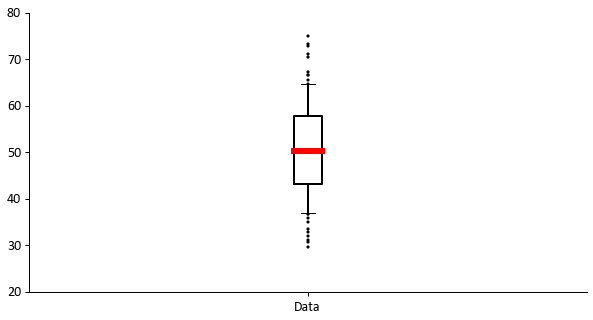

In [13]:
# Basic, single boxplot with figsize being the 'estep_style' standard (10,5)
# Not great for a lot of reasons, but good starting point

f, ax = plt.subplots(1)
ax.boxplot(data1,
           labels=['Data'],
           widths=0.05,
           whis=whis,
           whiskerprops=whiskerprops,
           boxprops=boxprops,
           medianprops=medianprops,
           flierprops=flierprops)
simpleaxis(ax)
plt.show()

## I played around with box width proportions and a few other things to make the plots a little prettier and begin to standardize them

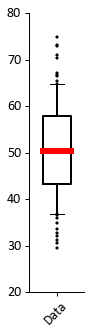

In [14]:
f, ax = plt.subplots(1, figsize=(1,5))
ax.boxplot(data1,
           labels=['Data'],
           widths=0.5,
           whis=whis,
           whiskerprops=whiskerprops,
           boxprops=boxprops,
           medianprops=medianprops,
           flierprops=flierprops)
simpleaxis(ax)
plt.xticks(rotation=45)
plt.tight_layout
plt.show()

# Nailed it

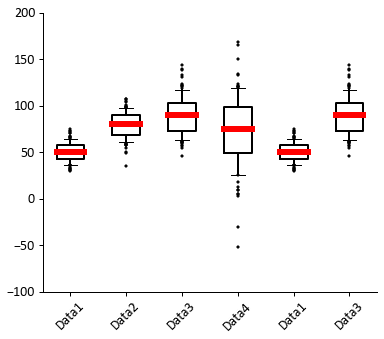

In [15]:
# Dynamically set the width based on size of data set

data_set = [data1, data2, data3, data4, data1, data3]
data_labels = ['Data1', 'Data2', 'Data3', 'Data4', 'Data1', 'Data3']

# data_set = [data1, data2, data3]
# data_labels = ['Data1', 'Data2', 'Data3']

f, ax = plt.subplots(1, figsize=(len(data_set),5))

ax.boxplot(data_set,
           labels=data_labels,
           widths=0.5, 
           whis=whis, 
           whiskerprops=whiskerprops, 
           boxprops=boxprops, 
           medianprops=medianprops, 
           flierprops=flierprops)
simpleaxis(ax)
plt.xticks(rotation=45)
# plt.savefig('test_boxplot.pdf')
plt.show()

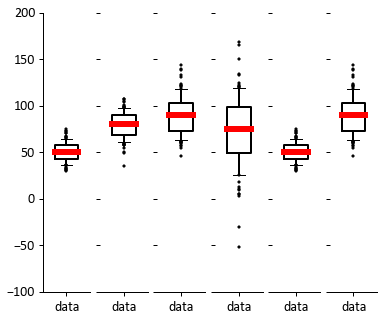

In [16]:
# You CAN plot them all independently if you'd like them more modular, 
# but i can't figure out how to get rid of some of the tick marks...

f, ax = plt.subplots(1,len(data_set), figsize=(len(data_set),5), sharey=True)
for i in range(len(data_set)):
    ax[i].boxplot(data_set[i],
                  labels=['data'],
                  widths=0.5, 
                  whis=whis, 
                  whiskerprops=whiskerprops, 
                  boxprops=boxprops, 
                  medianprops=medianprops, 
                  flierprops=flierprops)
    if i >= 1:
        ax[i].spines['left'].set_visible(False)
    simpleaxis(ax[i])
plt.show()

# Add-ons

(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text xticklabel objects>)

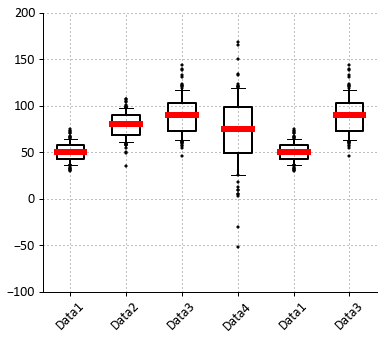

In [17]:
# wanna add a grid? easy: plt.grid(True)

f, ax = plt.subplots(1, figsize=(len(data_set),5))
ax.boxplot(data_set,labels=data_labels,widths=0.5,whis=whis,whiskerprops=whiskerprops,boxprops=boxprops,medianprops=medianprops,flierprops=flierprops)
simpleaxis(ax)
plt.grid(True)
plt.xticks(rotation=45)